In [2]:
from utils import split_data

PATH = "./data/"
splitter = split_data(PATH + "raw.csv", PATH, test_size=0.1,
                          train_size=0.3)
x_train, y_train, x_test, y_test = splitter.split()

In [3]:
from utils import translate

translater = translate()
x_train = translater.translate(x_train)
x_test = translater.translate(x_test)

In [4]:
from utils import standardize

y_train_std, y_test_std = standardize(y_train, y_test)

In [5]:
from keras.layers import (Embedding, Bidirectional, CuDNNGRU, Dense)
from modelArchitecture.Attention import Attention
from modelArchitecture.ResnetRnnDense import ResnetRnnDense

class simple_model():
    def compile(self, x):
        x = Embedding(22, 32, input_length=32)(x)
        x = Bidirectional(CuDNNGRU(256, return_sequences=True))(x)
        x = CuDNNGRU(512, return_sequences=True)(x)
        x = Attention()(x)
        x = Dense(512, activation="elu")(x)
        return Dense(1)(x)

In [6]:
from HydraMethod import HydraMethod

In [7]:
one_head_hydra = HydraMethod(simple_model, 1);one_head_hydra.compile()

In [8]:
from utils import LRFinder

In [9]:
lr_finder = LRFinder(one_head_hydra.get_model())
lr_finder.find(one_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 64, 3,fit=True)

Epoch 1/3
331300/331300 [==============================] - 103s 312us/step - loss: 0.4097
Epoch 2/3
271296/331300 [=======================>......] - ETA: 17s - loss: 0.1638

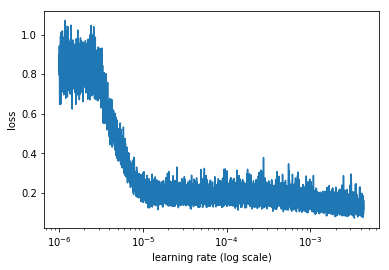

In [10]:
lr_finder.plot_loss()

In [11]:
one_head_hydra.compile(learning_rate=1e-4)
trained_one_head_hydra = one_head_hydra.fit(x_train, y_train_std, x_test, y_test_std,batch_size=64)

Train on 331300 samples, validate on 104716 samples
Epoch 1/3
331300/331300 [==============================] - 110s 331us/step - loss: 0.0803 - val_loss: 0.0782
Epoch 2/3
331300/331300 [==============================] - 107s 323us/step - loss: 0.0680 - val_loss: 0.0716
Epoch 3/3
331300/331300 [==============================] - 107s 322us/step - loss: 0.0615 - val_loss: 0.0656


In [13]:
two_head_hydra = HydraMethod(simple_model, 2);two_head_hydra.compile()

In [14]:
lr_finder = LRFinder(two_head_hydra.get_model())
lr_finder.find(two_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 64, 3,fit=True)

Epoch 1/3
331300/331300 [==============================] - 195s 590us/step - loss: 0.4093
Epoch 2/3
273216/331300 [=======================>......] - ETA: 32s - loss: 0.1557

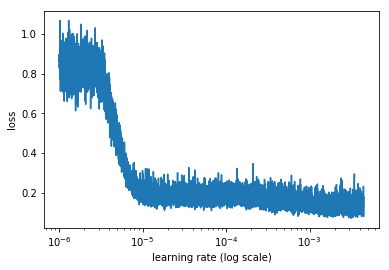

In [15]:
lr_finder.plot_loss()

In [16]:
two_head_hydra.compile(learning_rate=1e-4)
trained_two_head_hydra = two_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=64)

Train on 331300 samples, validate on 104716 samples
Epoch 1/3
331300/331300 [==============================] - 198s 597us/step - loss: 0.0762 - val_loss: 0.0753
Epoch 2/3
331300/331300 [==============================] - 196s 591us/step - loss: 0.0642 - val_loss: 0.0670
Epoch 3/3
331300/331300 [==============================] - 195s 590us/step - loss: 0.0581 - val_loss: 0.0657


In [17]:
three_head_hydra = HydraMethod(simple_model, 3);three_head_hydra.compile()

In [18]:
lr_finder = LRFinder(three_head_hydra.get_model())
lr_finder.find(three_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 64, 3,fit=True)

Epoch 1/3
331300/331300 [==============================] - 280s 845us/step - loss: 0.3973
Epoch 2/3
311232/331300 [===========================>..] - ETA: 16s - loss: 0.1501

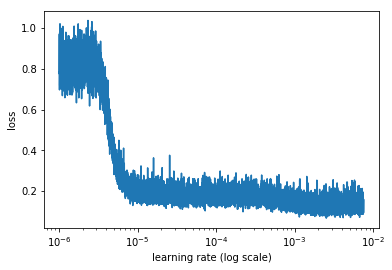

In [19]:
lr_finder.plot_loss()

In [20]:
three_head_hydra.compile(learning_rate=1e-4)
trained_three_head_hydra = three_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=64)

Train on 331300 samples, validate on 104716 samples
Epoch 1/3
331300/331300 [==============================] - 302s 912us/step - loss: 0.0723 - val_loss: 0.0698
Epoch 2/3
331300/331300 [==============================] - 300s 906us/step - loss: 0.0604 - val_loss: 0.0689
Epoch 3/3
331300/331300 [==============================] - 301s 908us/step - loss: 0.0559 - val_loss: 0.0619


In [21]:
four_head_hydra = HydraMethod(simple_model, 4);four_head_hydra.compile()

In [22]:
lr_finder = LRFinder(four_head_hydra.get_model())
lr_finder.find(four_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 64, 3,fit=True)

Epoch 1/3
331300/331300 [==============================] - 377s 1ms/step - loss: 0.3799
Epoch 2/3
215616/331300 [==================>...........] - ETA: 2:10 - loss: 0.1636

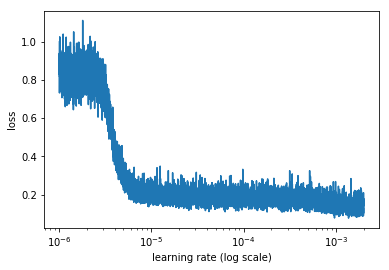

In [23]:
lr_finder.plot_loss()

In [24]:
four_head_hydra.compile(learning_rate=1e-4)
trained_four_head_hydra = four_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=64)

Train on 331300 samples, validate on 104716 samples
Epoch 1/3
331300/331300 [==============================] - 411s 1ms/step - loss: 0.0891 - val_loss: 0.0849
Epoch 2/3
331300/331300 [==============================] - 406s 1ms/step - loss: 0.0755 - val_loss: 0.0770
Epoch 3/3
331300/331300 [==============================] - 407s 1ms/step - loss: 0.0687 - val_loss: 0.0755


In [ ]:
one_head_hydra = HydraMethod(ResnetRnnDense, 1);one_head_hydra.compile()

In [ ]:
from utils import LRFinder

In [ ]:
lr_finder = LRFinder(one_head_hydra.get_model())
lr_finder.find(one_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 64, 3,fit=True)

In [ ]:
lr_finder.plot_loss()

In [ ]:
one_head_hydra.compile(learning_rate=1e-3)
trained_one_head_hydra = one_head_hydra.fit(x_train, y_train_std, x_test, y_test_std)

In [ ]:
two_head_hydra = HydraMethod(ResnetRnnDense, 2);two_head_hydra.compile()

In [ ]:
lr_finder = LRFinder(two_head_hydra.get_model())
lr_finder.find(two_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 64, 3,fit=True)

In [ ]:
lr_finder.plot_loss()

In [ ]:
two_head_hydra.compile(learning_rate=4e-5)
trained_two_head_hydra = two_head_hydra.fit(x_train, y_train_std, x_test, y_test_std)